## Observations

1.Capomulin outperforms the other drugs as well as the placebo in terms of tumor volume, number of metastatic sites, and survival rate.

2.The Drug regimen of Capomulin was effective in reducing the tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely healed.

3.Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume.




In [922]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

In [923]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("mouse_metadata.csv")
study_results = pd.read_csv("study_results.csv")

# Combine the data into a single dataset

data_merge = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
data_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [924]:
# Checking the number of mice.
data_merge["Mouse ID"].nunique()

249

In [925]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_MouseID = data_merge[data_merge.duplicated(["Mouse ID", "Timepoint"])]
duplicate_MouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [926]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_merge.drop([909,911,913,915,917],0,inplace=True)

In [927]:
# Checking the number of mice in the clean DataFrame.
data_merge["Mouse ID"].nunique()

249

In [928]:
#Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = tumor_mean = data_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = tumor_mean = data_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_variance = tumor_mean = data_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = tumor_mean = data_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = tumor_mean = data_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({"Mean": regimen_mean,
                          "Median": regimen_median,
                          "Variance": regimen_variance,
                          "Standard Deviation": regimen_std,
                          "SEM": regimen_sem})

#Formatting table
summary_df.style.set_properties(**{'text-align': 'left','border-color':'Black','border-width':'thin','border-style':'solid'}) \
                  .set_table_styles([{'selector':'th','props':[('border','thin solid'),('text-align','left')]}])

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


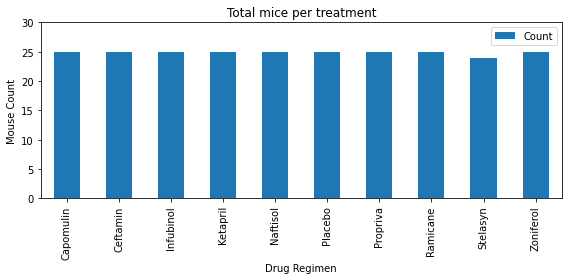

In [929]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_regime = data_merge.groupby("Drug Regimen")["Mouse ID"].nunique()
total_mice = pd.DataFrame({"Count": total_mice_regime})
#Bar plot
total_mice.plot(kind="bar", figsize=(8,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Total mice per treatment")
plt.ylim(0,30)
plt.tight_layout()
plt.show()


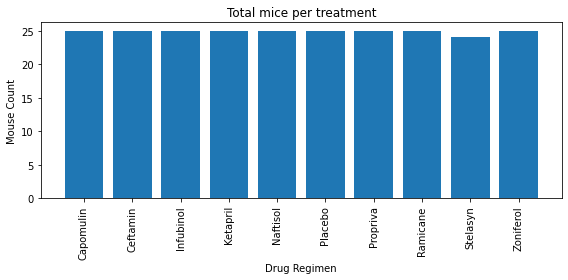

In [930]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#total_mice
y_axis = total_mice["Count"]
x_axis = list(total_mice.index)
plt.figure(figsize=(8,4))
plt.bar(x_axis,y_axis)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.title("Total mice per treatment")
plt.tight_layout()
plt.show()


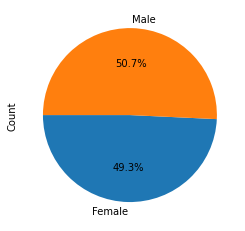

In [931]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_gender = pd.DataFrame(data_merge.groupby(["Sex"]).count()).reset_index()
total_gender = total_gender[["Sex", "Mouse ID"]]
total_gender = total_gender.rename(columns={"Mouse ID": "Count"})
total_gender.plot(kind="pie", y = "Count",explode=None, labels= total_gender["Sex"], startangle=180, autopct="%1.1f%%",legend=False)
plt.show()

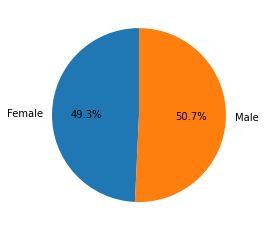

In [932]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_gender_pie = pd.DataFrame(data_merge.groupby(["Sex"]).count()).reset_index()
total_gender_pie = total_gender_pie[["Sex", "Mouse ID"]]
labels = total_gender_pie["Sex"]
count = total_gender_pie["Mouse ID"]
colors = ["tab:blue", "tab:orange"]
explode = [0,0]
plot = plt.pie(count,explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)


In [933]:
drug_regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

#for x in drug_regimen:
filtered_df = data_merge.loc[data_merge["Drug Regimen"].isin(drug_regimen)]
filtered_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [934]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_df = data_merge.loc[data_merge["Drug Regimen"]== "Capomulin"]

# Capomulin
capomulin_duplicate = capomulin_df.drop_duplicates(subset="Mouse ID", keep="last")
last_timepoint_capomulin = capomulin_duplicate.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(last_timepoint_capomulin)
capomulin_vol = pd.merge(capomulin_vol,data_merge, on=("Mouse ID","Timepoint"), how="inner")
capomulin_vol = capomulin_vol.sort_values("Timepoint", ascending=False)

#Calculate the IQR and Quartlies for Capomulin:
quartiles_cap = capomulin_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_lower_cap = quartiles_cap[0.25]
quartiles_upper_cap = quartiles_cap[0.75]
iqr_cap = quartiles_upper_cap-quartiles_lower_cap

# Determine upper and lower bounds
lower_bound_cap = quartiles_lower_cap - (1.5*iqr)
upper_bound_cap = quartiles_upper_cap + (1.5*iqr)

outliers_cap = capomulin_vol.loc[(capomulin_vol["Tumor Volume (mm3)"] > upper_bound_cap) | \
                           (capomulin_vol["Tumor Volume (mm3)"] < lower_bound_cap)]

print(f"The lower quartile of Capomulin volume is: {quartiles_lower_cap}")
print(f"The upper quartile of Capomulin volume is: {quartiles_upper_cap}")
print(f"The interquartile range of Capomulin volume is: {iqr_cap}")
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

The lower quartile of Capomulin volume is: 32.37735684
The upper quartile of Capomulin volume is: 40.1592203
The interquartile range of Capomulin volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [935]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ramicane_df = data_merge.loc[data_merge["Drug Regimen"]== "Ramicane"]

# Ramicane
ramicane_duplicate = ramicane_df.drop_duplicates(subset="Mouse ID", keep="last")
last_timepoint_capomulin = ramicane_duplicate.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(last_timepoint_ramicane)
ramicane_vol = pd.merge(ramicane_vol,data_merge, on=("Mouse ID","Timepoint"), how="inner")
ramicane_vol = ramicane_vol.sort_values("Timepoint", ascending=False)

#Calculate the IQR and Quartlies for Ramicane:
quartiles_rami = ramicane_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_lower_rami = quartiles_rami[0.25]
quartiles_upper_rami = quartiles_rami[0.75]
iqr_rami = quartiles_upper_rami-quartiles_lower_rami

# Determine upper and lower bounds
lower_bound_rami = quartiles_lower_rami - (1.5*iqr_rami)
upper_bound_rami = quartiles_upper_rami + (1.5*iqr_rami)

outliers_rami = ramicane_vol.loc[(ramicane_vol["Tumor Volume (mm3)"] > upper_bound_rami) | \
                           (ramicane_vol["Tumor Volume (mm3)"] < lower_bound_rami)]

print(f"The lower quartile of Ramicane volume is: {quartiles_lower_rami}")
print(f"The upper quartile of Ramicane volume is: {quartiles_upper_rami}")
print(f"The interquartile range of Ramicane volume is: {iqr_rami}")
print(f"Values below {lower_bound_rami} could be outliers.")
print(f"Values above {upper_bound_rami} could be outliers.")

The lower quartile of Ramicane volume is: 31.56046955
The upper quartile of Ramicane volume is: 40.65900627
The interquartile range of Ramicane volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [936]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

infubinol_df = data_merge.loc[data_merge["Drug Regimen"]== "Infubinol"]

# Infubinol
infubinol_duplicate = infubinol_df.drop_duplicates(subset="Mouse ID", keep="last")
last_timepoint_infubinol = infubinol_duplicate.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(last_timepoint_infubinol)
infubinol_vol = pd.merge(infubinol_vol,data_merge, on=("Mouse ID","Timepoint"), how="inner")
infubinol_vol = infubinol_vol.sort_values("Timepoint", ascending=False)

#Calculate the IQR and Quartlies for Infubinol:
quartiles_inf = infubinol_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_lower_inf = quartiles_inf[0.25]
quartiles_upper_inf = quartiles_inf[0.75]
iqr_inf = quartiles_upper_inf-quartiles_lower_inf

# Determine upper and lower bounds
lower_bound_inf = quartiles_lower_inf - (1.5*iqr_inf)
upper_bound_inf = quartiles_upper_inf + (1.5*iqr_inf)

outliers_inf = infubinol_vol.loc[(infubinol_vol["Tumor Volume (mm3)"] > upper_bound_inf) | \
                           (infubinol_vol["Tumor Volume (mm3)"] < lower_bound_inf)]

print(f"The lower quartile of Infubinol volume is: {quartiles_lower_inf}")
print(f"The upper quartile of Infubinol volume is: {quartiles_upper_inf}")
print(f"The interquartile range of Infubinol volume is: {iqr_inf}")
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")

The lower quartile of Infubinol volume is: 54.04860769
The upper quartile of Infubinol volume is: 65.52574285
The interquartile range of Infubinol volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [937]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ceftamin_df = data_merge.loc[data_merge["Drug Regimen"]== "Ceftamin"]

# Ceftamin
ceftamin_duplicate = ceftamin_df.drop_duplicates(subset="Mouse ID", keep="last")
last_timepoint_ceftamin = ceftamin_duplicate.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(last_timepoint_ceftamin)
ceftamin_vol = pd.merge(ceftamin_vol,data_merge, on=("Mouse ID","Timepoint"), how="inner")
ceftamin_vol = ceftamin_vol.sort_values("Timepoint", ascending=False)

#Calculate the IQR and Quartlies for Ceftamin:
quartiles_ceft = ceftamin_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
quartiles_lower_ceft = quartiles_ceft[0.25]
quartiles_upper_ceft = quartiles_ceft[0.75]
iqr_ceft = quartiles_upper_ceft-quartiles_lower_ceft

# Determine upper and lower bounds
lower_bound_ceft = quartiles_lower_ceft - (1.5*iqr_ceft)
upper_bound_ceft = quartiles_upper_ceft + (1.5*iqr_ceft)

outliers_ceft = ceftamin_vol.loc[(ceftamin_vol["Tumor Volume (mm3)"] > upper_bound_ceft) | \
                           (ceftamin_vol["Tumor Volume (mm3)"] < lower_bound_ceft)]

print(f"The lower quartile of Ceftamin volume is: {quartiles_lower_ceft}")
print(f"The upper quartile of Ceftamin volume is: {quartiles_upper_ceft}")
print(f"The interquartile range of Ceftamin volume is: {iqr_ceft}")
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")

The lower quartile of Ceftamin volume is: 48.72207785
The upper quartile of Ceftamin volume is: 64.29983003
The interquartile range of Ceftamin volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


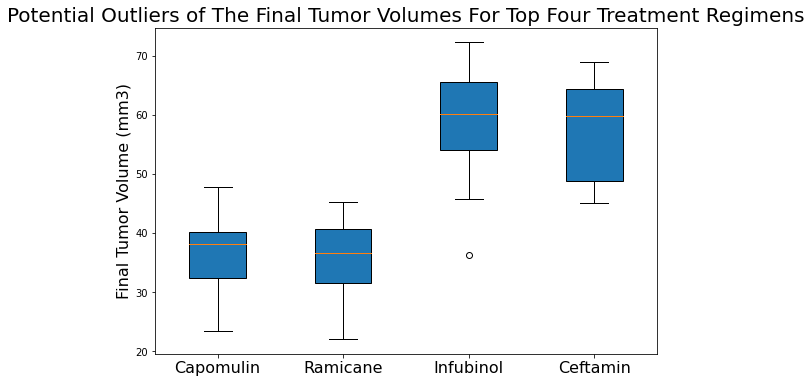

In [939]:
#Combining the data in to the list:
capomulin_list=capomulin_vol['Tumor Volume (mm3)']
ramicane_list=ramicane_vol['Tumor Volume (mm3)']
infubinol_list=infubinol_vol['Tumor Volume (mm3)']
ceftamin_list=ceftamin_vol['Tumor Volume (mm3)']

tumor_volume_list = [capomulin_list,ramicane_list,infubinol_list,ceftamin_list]

# Outliers plot of the final tumor volumes:
fig, ax=plt.subplots(1, figsize=(9, 6))
box_plot=ax.boxplot(tumor_volume_list, patch_artist=True)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=16, color='black')
plt.show()

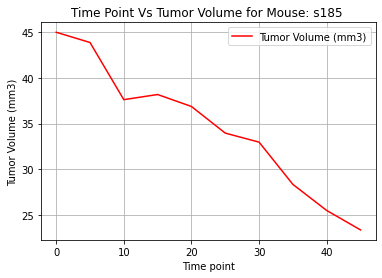

In [940]:
#Line and Scatter Plots
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = data_merge.loc[data_merge["Drug Regimen"]== "Capomulin"]
capomulin_mouse= capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_mouse.plot("Timepoint", "Tumor Volume (mm3)",color="red", label="Tumor Volume (mm3)")
plt.title("Time Point Vs Tumor Volume for Mouse: s185 ")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

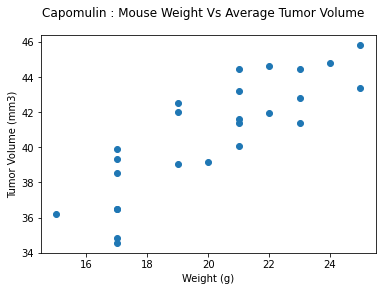

In [941]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_weight = capomulin_df.groupby("Mouse ID")
cap_weight_ave = capomulin_mouse_weight["Weight (g)"].mean()
cap_tumor_ave = capomulin_mouse_weight["Tumor Volume (mm3)"].mean()
cap_df = pd.DataFrame({"Weight (g)": cap_weight_ave,
                     "Tumor Volume (mm3)": cap_tumor_ave})
plt.scatter(cap_df["Weight (g)"], cap_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.suptitle("Capomulin : Mouse Weight Vs Average Tumor Volume")
plt.show()

In [942]:
#Correlation and Regression
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_df["Weight (g)"],cap_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor is 0.84


The r-squared is: 0.8419363424694718
The equation of the regression line is: y = 0.95x + 21.55


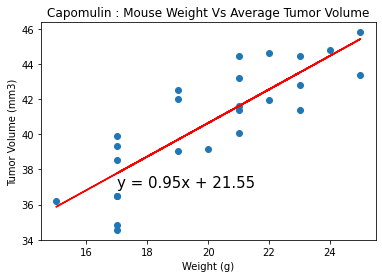

In [943]:
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
x_values = cap_df["Weight (g)"]
y_values = cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Capomulin : Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")